In [2]:
# install packages
# ! pip install numpy
# ! pip install scipy
# ! pip install dcor
# ! pip install gpytorch
# ! pip install pandas
# ! pip install networkx
# ! pip install matplotlib==3.1.3
# !pip install sklearn

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
from tigramite.models import LinearMediation, Prediction
from sklearn.preprocessing import StandardScaler


Bad key "text.kerning_factor" on line 4 in
C:\Users\Emily Mai\anaconda3\envs\renvs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Could not import packages for CMIknn and GPDC estimation


In [4]:
df = pd.read_csv("prices.csv")
stocks = df[df["symbol"] == "IBM"][["date","close"]]
stocks = stocks.set_index("date").rename(columns={"close":"IBM"})

for stock in ["AMZN", "GOOGL", "AAPL", "YHOO", "NFLX", "FB", "DOW", "NDAQ", "ORCL"]:
    closing = df[df["symbol"] == stock][["date","close"]]
    closing = closing.set_index("date").rename(columns={"close":stock})
    stocks = stocks.join(closing)
dates = np.array(stocks.index)
dates
stocks = stocks.dropna().to_numpy()
stocks

array([[196.350006, 257.309998, 723.250034, ...,  33.049999,  25.76    ,
         34.689999],
       [195.270004, 258.480011, 723.670024, ...,  33.150002,  26.379999,
         34.310001],
       [193.990005, 259.149994, 737.96998 , ...,  33.630001,  26.48    ,
         34.610001],
       ...,
       [166.190002, 772.130005, 804.570007, ...,  57.900002,  67.339996,
         38.68    ],
       [166.600006, 765.150024, 802.880005, ...,  57.419998,  67.010002,
         38.689999],
       [165.990005, 749.869995, 792.450012, ...,  57.220001,  67.120003,
         38.450001]])

(<Figure size 720x1440 with 10 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9A705B548>,
       dtype=object))

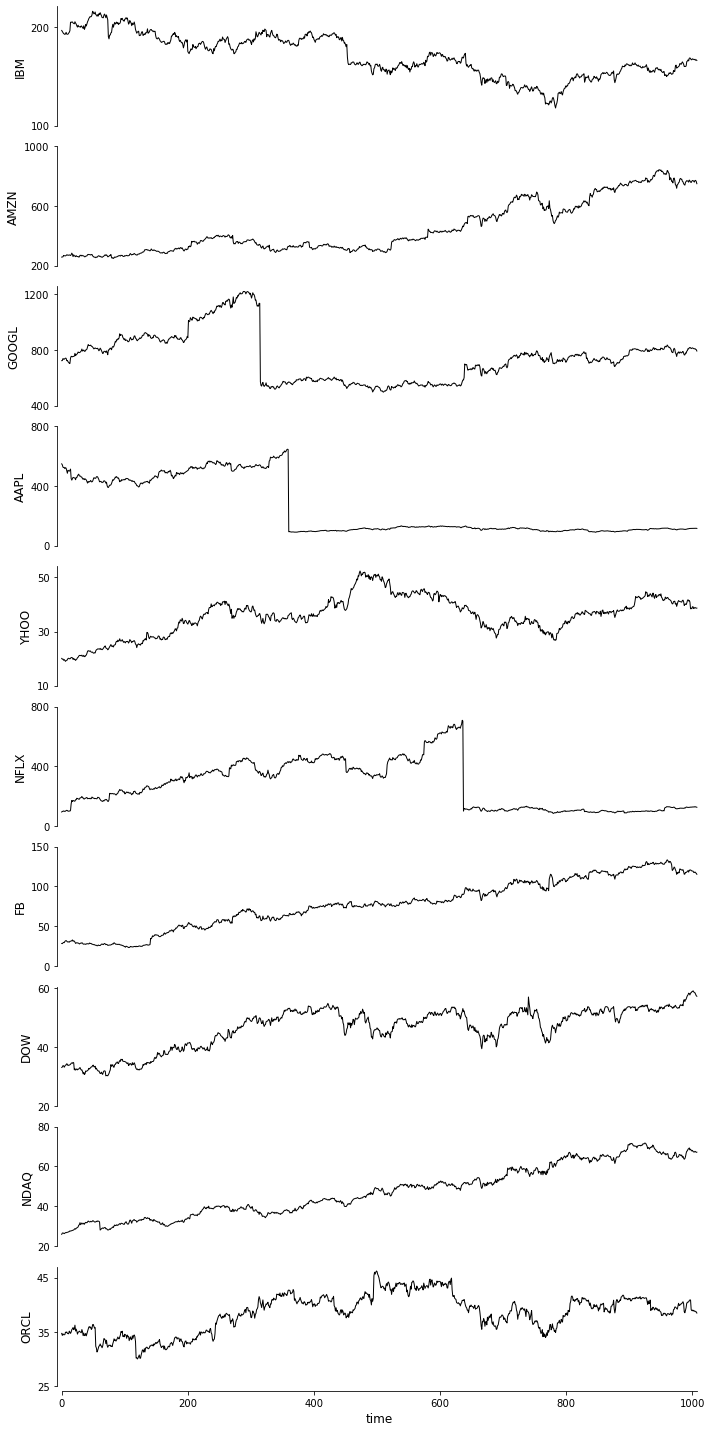

In [5]:
var_names = ["IBM", "AMZN", "GOOGL", "AAPL", "YHOO", "NFLX", "FB", "DOW", "NDAQ", "ORCL"]
stocks_pp = pp.DataFrame(stocks, var_names=var_names)

tp.plot_timeseries(stocks_pp, figsize=(10,20))

In [6]:
# implement linear partial correlation
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=stocks_pp, 
              cond_ind_test=cond_ind_test,
              verbosity=1)
# plot lagged correlations to determine max time lag
correlations = pcmci.get_lagged_dependencies(tau_max=10)


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 10


In [7]:
results = pcmci.run_pcmci(tau_max=7, pc_alpha=None)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 7
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable IBM has 2 link(s):
    [pc_alpha = 0.3]
        (IBM -1): max_pval = 0.00000, min_val =  0.712
        (AAPL -1): max_pval = 0.24886, min_val =  0.037

    Variable AMZN has 5 link(s):
    [pc_alpha = 0.3]
        (AMZN -1): max_pval = 0.00000, min_val =  0.709
        (NDAQ -3): max_pval = 0.07173, min_val = -0.057
        (NDAQ -4): max_pval = 0.21212, min_val = -0.040
        (NDAQ -2): max_pval = 0.22151, min_val =  0.039
        (FB -2): max_pval = 0.29224, min_val =  0.033

    Variable GOOGL has 6 link(s):
    [pc_alpha = 0.5]
        (GOOGL -1): max_pval = 0.00000, min_val =  0.708
        (YHOO -6): max_pval = 0.22876, min_val =  0.038
        (GOOGL -7): max_pval = 0.30679, min_val = -0.033
        (YHOO -3): max_pval

In [8]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.263 0.732 0.491 0.538 0.375 0.751]
  [0.    0.201 0.304 0.037 0.432 0.199 0.464 0.846]
  [0.    0.942 0.518 0.34  0.989 0.031 0.322 0.003]
  [0.164 0.356 0.292 0.982 0.492 0.455 0.57  0.735]
  [0.    0.566 0.051 0.153 0.377 0.671 0.267 0.806]
  [0.109 0.469 0.095 0.217 0.572 0.388 0.512 0.737]
  [0.    0.358 0.405 0.091 0.103 0.073 0.094 0.458]
  [0.    0.698 0.63  0.187 0.04  0.12  0.453 0.251]
  [0.    0.966 0.037 0.654 0.006 0.423 0.299 0.816]
  [0.    0.865 0.912 0.281 0.453 0.858 0.157 0.937]]

 [[0.    0.318 0.29  0.818 0.683 0.939 0.99  0.748]
  [1.    0.    0.681 0.741 0.766 0.218 0.333 0.596]
  [0.    0.361 0.517 0.587 0.658 0.443 0.139 0.505]
  [0.241 0.479 0.072 0.928 0.865 0.941 0.884 0.586]
  [0.    0.981 0.446 0.729 0.402 0.912 0.801 0.035]
  [0.003 0.316 0.836 0.935 0.779 0.215 0.598 0.848]
  [0.    0.146 0.697 0.392 0.052 0.507 0.46  0.03 ]
  [0.    0.442 0.835 0.155 0.078 0.681 0.67  0.247]
  [0.    0.36  0.951 0.677 0.937 0.299 0.936 0.349]
 

In [9]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(p_matrix=results['p_matrix'],
                              q_matrix=q_matrix,
                              val_matrix=results['val_matrix'],
                              alpha_level=0.05)


## Significant links at alpha = 0.05:

    Variable IBM has 9 link(s):
        (IBM -1): pval = 0.00000 | qval = 0.00000 | val =  0.710
        (ORCL  0): pval = 0.00000 | qval = 0.00000 | val =  0.484
        (DOW  0): pval = 0.00000 | qval = 0.00000 | val =  0.351
        (NDAQ  0): pval = 0.00000 | qval = 0.00000 | val =  0.332
        (YHOO  0): pval = 0.00000 | qval = 0.00000 | val =  0.262
        (AMZN  0): pval = 0.00000 | qval = 0.00000 | val =  0.248
        (FB  0): pval = 0.00000 | qval = 0.00000 | val =  0.238
        (GOOGL  0): pval = 0.00000 | qval = 0.00000 | val =  0.188
        (NFLX -4): pval = 0.00000 | qval = 0.00006 | val =  0.156

    Variable AMZN has 10 link(s):
        (AMZN -1): pval = 0.00000 | qval = 0.00000 | val =  0.707
        (FB  0): pval = 0.00000 | qval = 0.00000 | val =  0.521
        (YHOO  0): pval = 0.00000 | qval = 0.00000 | val =  0.371
        (NDAQ  0): pval = 0.00000 | qval = 0.00000 | val =  0.299
        (ORCL  0): pval = 0.00000 | qval

(<Figure size 1440x720 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a9ab0ffe48>)

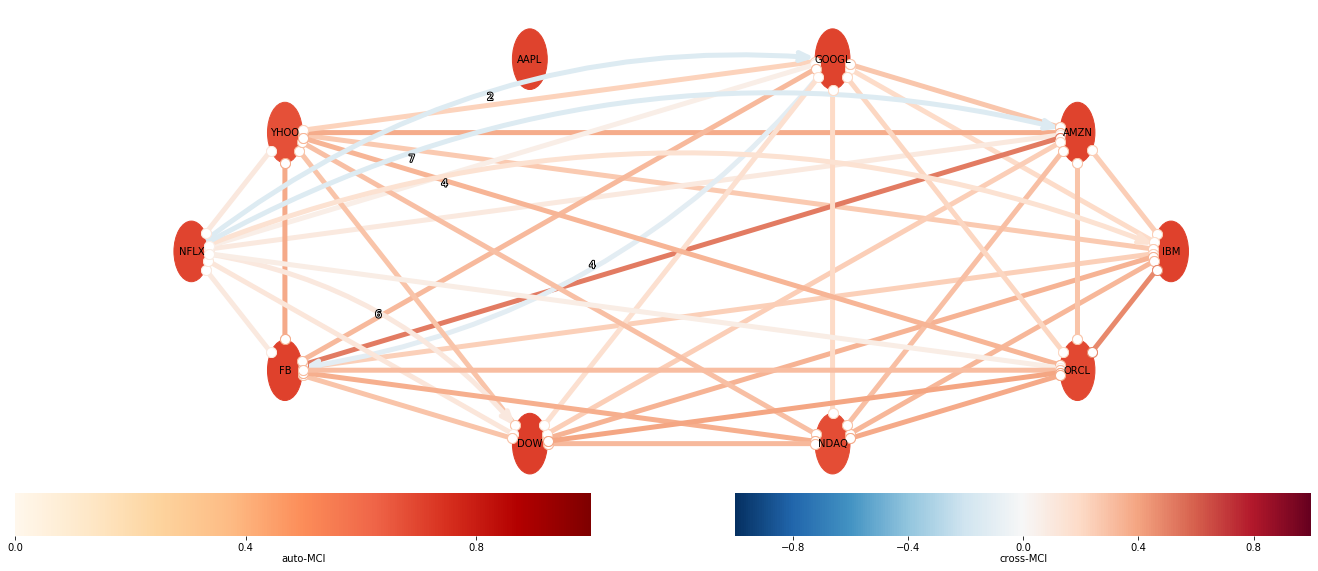

In [10]:
links = pcmci.return_significant_links(pq_matrix=q_matrix,
                                       val_matrix=results['val_matrix'],
                                       alpha_level=0.05)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=links["link_matrix"],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    figsize=(20,10)
    )

(<Figure size 1440x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a9abfe0648>)

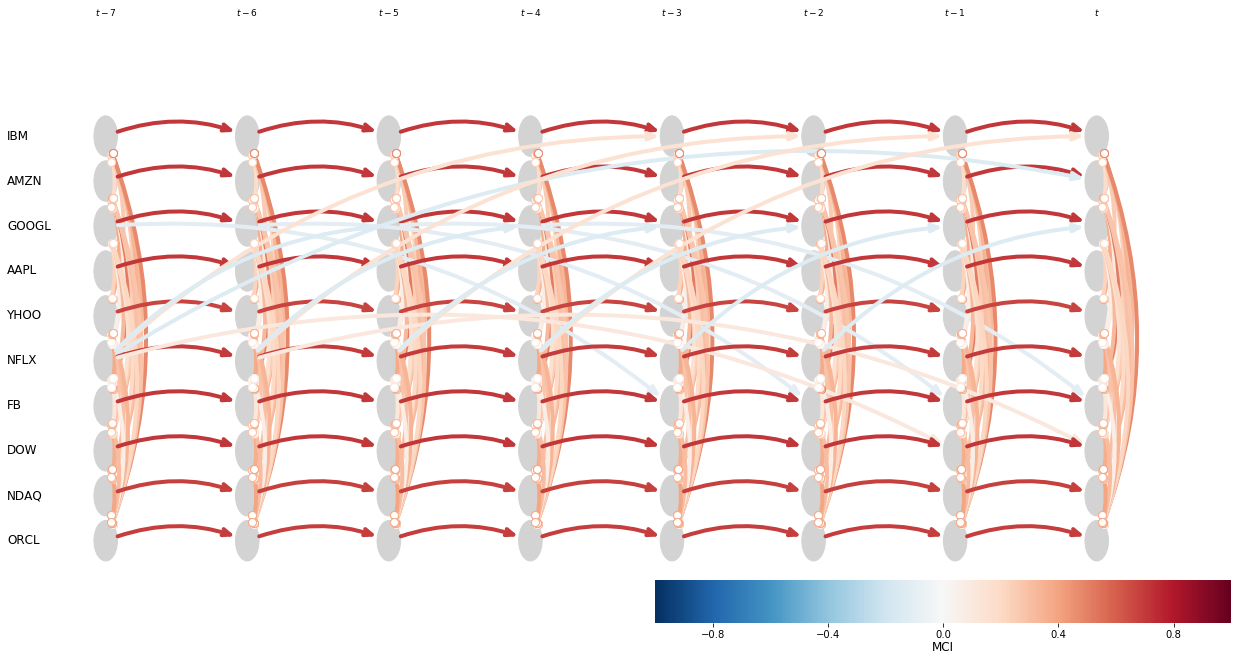

In [11]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    link_matrix=links["link_matrix"],
    var_names=var_names,
    link_colorbar_label='MCI',
    figsize=(20,10)
    )

In [12]:
# fit linear mediation model
scaler = StandardScaler()
scaler.fit(stocks)
med = LinearMediation(dataframe=stocks_pp, data_transform=scaler)
med.fit_model(all_parents=links["link_dict"], tau_max=7)

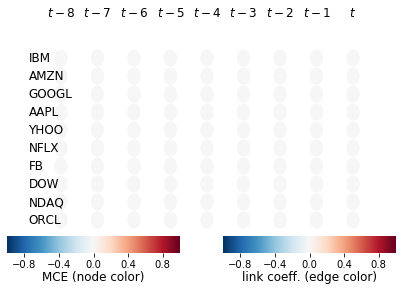

Contemporaneous I(0; 1)=1.000 != I(1; 0)=0.000 due to conditions, finite sample effects or masking, here edge color = larger (absolute) value.


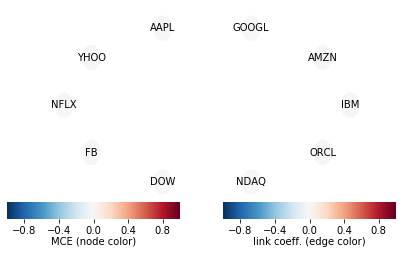

In [13]:
graph_data = med.get_mediation_graph_data(i=0, tau=7, j=2, include_neighbors=False)
tp.plot_mediation_time_series_graph(
    var_names=var_names,
    path_node_array=graph_data['path_node_array'],
    tsg_path_val_matrix=graph_data['tsg_path_val_matrix']
)
tp.plot_mediation_graph(
    var_names=var_names,
    path_val_matrix=graph_data['path_val_matrix'], 
    path_node_array=graph_data['path_node_array'],
)

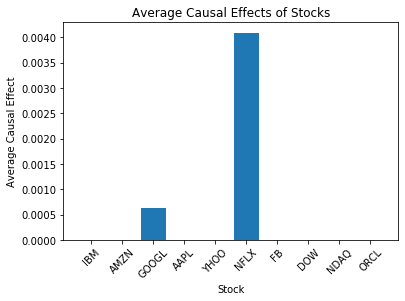

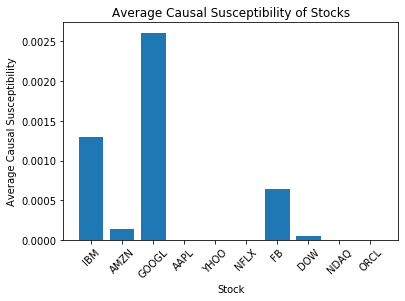

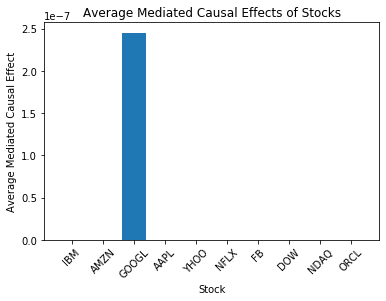

In [26]:
# print ("Average Causal Effect IBM=%.2, AMZN=%.2f, GOOGL=%.2f, AAPL=%.2f, YHOO=%.2f, NDAQ=%.2f, NFLX=%.2f, ORCL=%.2f, SNA=%.2f, FB=%.2f, EBAY=%.2f, DOW=%.2f " % tuple(med.get_all_ace()))
# print ("Average Causal Susceptibility IBM=%.2, AMZN=%.2f, GOOGL=%.2f, AAPL=%.2f, YHOO=%.2f, NDAQ=%.2f, NFLX=%.2f, ORCL=%.2f, SNA=%.2f, FB=%.2f, EBAY=%.2f, DOW=%.2f " % tuple(med.get_all_acs()))
# print ("Average Mediated Causal Effect IBM=%.2, AMZN=%.2f, GOOGL=%.2f, AAPL=%.2f, YHOO=%.2f, NDAQ=%.2f, NFLX=%.2f, ORCL=%.2f, SNA=%.2f, FB=%.2f, EBAY=%.2f, DOW=%.2f " % tuple(med.get_all_amce()))

plt.bar(np.arange(len(var_names)), med.get_all_ace())
plt.xticks(np.arange(len(var_names)), var_names, rotation=45)
plt.ylabel("Average Causal Effect")
plt.xlabel("Stock")
plt.title("Average Causal Effects of Stocks")
plt.show()

plt.bar(np.arange(len(var_names)), med.get_all_acs())
plt.xticks(np.arange(len(var_names)), var_names, rotation=45)
plt.ylabel("Average Causal Susceptibility")
plt.xlabel("Stock")
plt.title("Average Causal Susceptibility of Stocks")
plt.show()

plt.bar(np.arange(len(var_names)), med.get_all_amce())
plt.xticks(np.arange(len(var_names)), var_names, rotation=45)
plt.ylabel("Average Mediated Causal Effect")
plt.xlabel("Stock")
plt.title("Average Mediated Causal Effects of Stocks")
plt.show()